In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
df=pd.read_csv("C:\\Users\\DELL\\Documents\\College files Lovishka Soni\\codebasics\\week_14\\iplauction2023.csv",dtype={'name':'string','player style':'string','nationality':'string','franchise':'string','status':'string'})

In [9]:
df.head(5)

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,<NA>,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,<NA>,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    string 
 1   player style           309 non-null    string 
 2   nationality            309 non-null    string 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    string 
 6   status                 309 non-null    string 
dtypes: float64(2), string(5)
memory usage: 17.0 KB


In [15]:
df.shape

(309, 7)

In [21]:
df.describe()

,base price (in lacs),final price (in lacs)
count,151.000000,238.000000
mean,59.205298,368.067227
std,59.688337,449.070117
min,20.000000,20.000000
25%,20.000000,21.250000
50%,20.000000,150.000000
75%,75.000000,625.000000
max,200.000000,1850.000000


In [23]:
df.describe(include = ['string'])

,name,player style,nationality,franchise,status
count,309,309,309,238,309
unique,309,4,14,10,3
top,Abdul Basith,Bowler,India,RR,RETAINED
freq,1,111,201,25,158


In [19]:
####data cleaning

In [20]:
df.isnull().sum()

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                 71
status                     0
dtype: int64

In [31]:
df.corr(numeric_only=True)

,base price (in lacs),final price (in lacs)
base price (in lacs),1.000000,0.667296
final price (in lacs),0.667296,1.000000


In [32]:
df.nunique()

name                     309
player style               4
nationality               14
base price (in lacs)       8
final price (in lacs)     67
franchise                 10
status                     3
dtype: int64

In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
df.isna().any()

name                     False
player style             False
nationality              False
base price (in lacs)      True
final price (in lacs)     True
franchise                 True
status                   False
dtype: bool

In [115]:
df.fillna({
    'base price (in lacs)':df['base price (in lacs)'].mean(),
    'final price (in lacs)':df['final price (in lacs)'].mean(),
    'franchise':'unknown'
},inplace=True)
df.isnull().sum()

name                     0
player style             0
nationality              0
base price (in lacs)     0
final price (in lacs)    0
franchise                0
status                   0
dtype: int64

In [43]:
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,59.205298,20.000000,KKR,RETAINED
1,Ekant Sen,Batter,India,20.000000,368.067227,unknown,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.000000,368.067227,unknown,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.000000,150.000000,KKR,SOLD
4,Joe Root,Batter,England,100.000000,100.000000,RR,SOLD


In [44]:
####feature engineering

In [117]:
df['difference']=df['final price (in lacs)']-df['base price (in lacs)']
df['final>base']=df['final price (in lacs)']>df['base price (in lacs)']
df.head(10)

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status,f_rank,difference,final>base
0,Harshit Rana,Bowler,India,59.205298,20.000000,KKR,RETAINED,1,-39.205298,False
1,Ekant Sen,Batter,India,20.000000,368.067227,unknown,UNSOLD,2,348.067227,True
2,Wayne Parnell,Allrounder,South Africa,75.000000,368.067227,unknown,UNSOLD,2,293.067227,True
3,Shakib Al Hasan,Allrounder,Bangladesh,150.000000,150.000000,KKR,SOLD,2,0.000000,False
4,Joe Root,Batter,England,100.000000,100.000000,RR,SOLD,2,0.000000,False
5,Abdul Basith,Allrounder,India,20.000000,20.000000,RR,SOLD,1,0.000000,False
6,Prashant Chopra,Allrounder,India,20.000000,368.067227,unknown,UNSOLD,2,348.067227,True
7,Akeal Hosein,Bowler,West Indies,100.000000,100.000000,SRH,SOLD,2,0.000000,False
8,Raghav Goyal,Bowler,India,20.000000,20.000000,MI,SOLD,1,0.000000,False
9,Yudhvir Singh Charak,Allrounder,India,20.000000,20.000000,LSG,SOLD,1,0.000000,False


In [56]:
df.difference.sort_values(ascending=False)

150    1650.000000
292    1640.794702
148    1550.000000
296    1540.794702
307    1540.794702
          ...     
158     -39.205298
264     -39.205298
263     -39.205298
289     -39.205298
0       -39.205298
Name: difference, Length: 309, dtype: float64

In [118]:
df['ranking']=pd.qcut(df['difference'],4,labels=[1,2,3,4])
df.sample(10)

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status,f_rank,difference,final>base,ranking
88,Mohammad Nabi,Allrounder,Afghanistan,100.000000,368.067227,unknown,UNSOLD,2,268.067227,True,3
178,Kamlesh Nagarkoti,Bowler,India,59.205298,110.000000,DC,RETAINED,2,50.794702,True,2
216,Prasidh Krishna,Bowler,India,59.205298,1000.000000,RR,RETAINED,4,940.794702,True,4
40,Kulwant Khejroliya,Bowler,India,20.000000,20.000000,KKR,SOLD,1,0.000000,False,1
59,Jamie Overton,Allrounder,England,200.000000,368.067227,unknown,UNSOLD,2,168.067227,True,2
236,Raj Bawa,Bowler,India,59.205298,200.000000,PBKS,RETAINED,2,140.794702,True,2
132,Jason Holder,Allrounder,West Indies,200.000000,575.000000,RR,SOLD,4,375.000000,True,4
209,Pradeep Sangwan,Bowler,India,59.205298,20.000000,GT,RETAINED,1,-39.205298,False,1
124,Shaik Rasheed,Batter,India,20.000000,20.000000,CSK,SOLD,1,0.000000,False,1
97,Paul Stirling,Allrounder,Ireland,50.000000,368.067227,unknown,UNSOLD,2,318.067227,True,3


In [58]:
df['is_sold']=df.status.apply(lambda x : 1 if x=='SOLD' else 0)
df.sample(10)

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status,difference,final>base,ranking,is_sold
307,Rishabh Pant,WK-Batter,India,59.205298,1600.0,DC,RETAINED,1540.794702,True,4,0
212,T Natarajan,Bowler,India,59.205298,400.0,SRH,RETAINED,340.794702,True,3,0
14,Akash Vashist,Allrounder,India,20.000000,20.0,RR,SOLD,0.000000,False,1,1
120,Samarth Vyas,Allrounder,India,20.000000,20.0,SRH,SOLD,0.000000,False,1,1
158,Kumar Kartikeya,Allrounder,India,59.205298,20.0,MI,RETAINED,-39.205298,False,1,0
246,Navdeep Saini,Bowler,India,59.205298,260.0,RR,RETAINED,200.794702,True,2,0
25,Litton Das,WK-Batter,Bangladesh,50.000000,50.0,KKR,SOLD,0.000000,False,1,1
189,Prabhsimran Singh,WK-Batter,India,59.205298,60.0,PBKS,RETAINED,0.794702,True,2,0
162,Harpreet Brar,Bowler,India,59.205298,380.0,PBKS,RETAINED,320.794702,True,3,0
308,Axar Patel,Allrounder,India,59.205298,900.0,DC,RETAINED,840.794702,True,4,0


In [59]:
#### data visualization

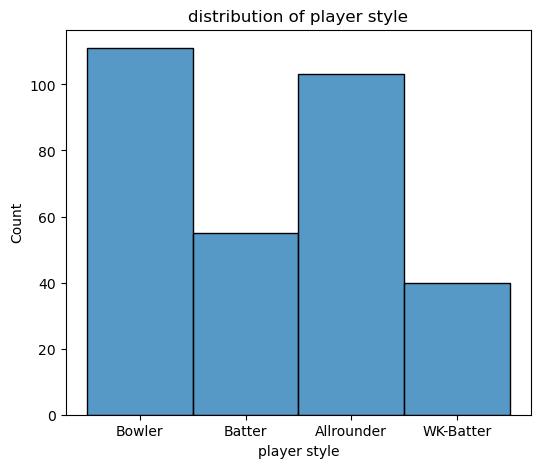

In [64]:
import seaborn as sns
plt.figure(figsize=(6,5))
sns.histplot(data=df,x='player style')
plt.title('distribution of player style')
plt.show()

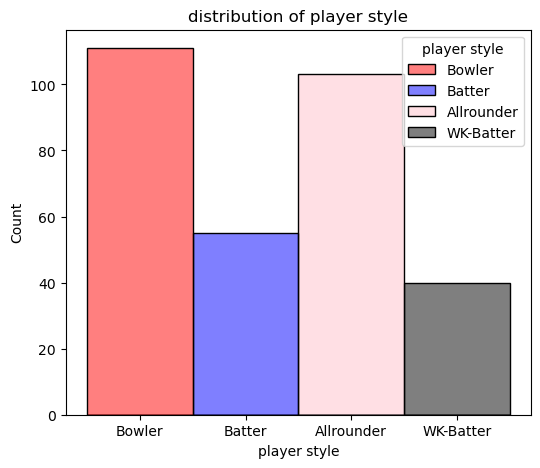

In [70]:
#to add color to the same visualization

plt.figure(figsize=(6,5))
custom_color={
    'Bowler':'red',
    'Batter':'blue',
    'Allrounder':'pink',
    'WK-Batter':'black'
}
sns.histplot(data=df,x='player style',hue='player style', palette=custom_color, legend=True)
plt.title('distribution of player style')
plt.show()

In [72]:
df['player style'].value_counts()

player style
Bowler        111
Allrounder    103
Batter         55
WK-Batter      40
Name: count, dtype: Int64

In [74]:
#pie chart for the % of players belonging to which country

nationality_count=df['nationality'].value_counts()
nationality_count

nationality
India           201
England          24
South Africa     19
West Indies      14
Australia        14
New Zealand      11
Sri Lanka         8
Afghanistan       7
Bangladesh        4
Ireland           2
Zimbabwe          2
Namibia           1
Netherlands       1
Singapore         1
Name: count, dtype: Int64

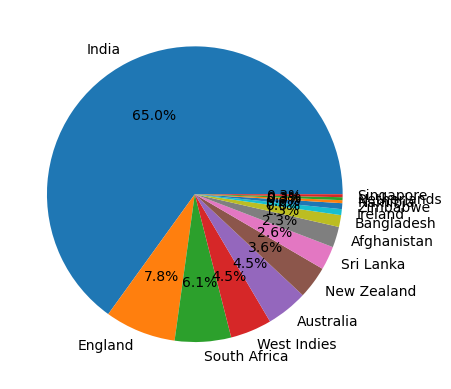

In [78]:
plt.pie(nationality_count,labels=nationality_count.index,autopct='%1.1f%%')
plt.show()

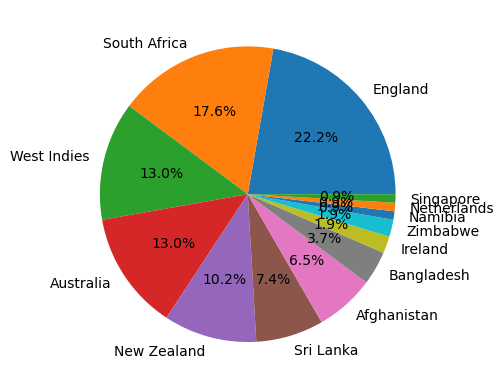

In [80]:
#pie chart for players other than india

nationality_count=df.nationality.value_counts()
if 'India' in nationality_count.index:
    nationality_count=nationality_count.drop('India')
plt.pie(nationality_count,labels=nationality_count.index,autopct='%1.1f%%')
plt.show()

In [84]:
#top 5 players with highest bid
sold_bid=df[df.status=='SOLD']
highest_bid=sold_bid.sort_values(by='final price (in lacs)',ascending=False).head(5)
highest_bid

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status,difference,final>base,ranking,is_sold
150,Sam Curran,Allrounder,England,200.0,1850.0,PBKS,SOLD,1650.0,True,4,1
148,Cameron Green,Allrounder,Australia,200.0,1750.0,MI,SOLD,1550.0,True,4,1
147,Ben Stokes,Allrounder,England,200.0,1625.0,CSK,SOLD,1425.0,True,4,1
136,Nicholas Pooran,WK-Batter,West Indies,200.0,1600.0,LSG,SOLD,1400.0,True,4,1
151,Harry Brook,Batter,England,150.0,1325.0,SRH,SOLD,1175.0,True,4,1


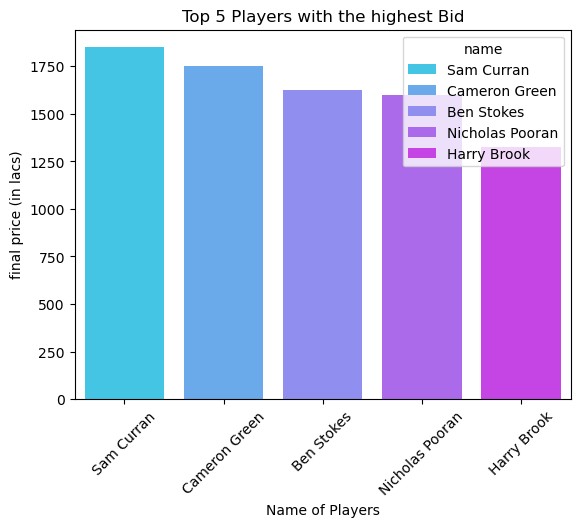

In [92]:
sns.barplot(data=highest_bid,x='name',y='final price (in lacs)',hue='name',palette='cool',legend=True)
plt.xlabel("Name of Players")
plt.title("Top 5 Players with the highest Bid")
plt.xticks(rotation = 45)
plt.show()

In [97]:
## Final Prices of all KKR Players using Line Scattered Chart
kkr=df[df.franchise=='KKR']
kkr

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status,difference,final>base,ranking,is_sold,jump
0,Harshit Rana,Bowler,India,59.205298,20.0,KKR,RETAINED,-39.205298,False,1,0,0.337808
3,Shakib Al Hasan,Allrounder,Bangladesh,150.000000,150.0,KKR,SOLD,0.000000,False,1,1,1.000000
18,Mandeep Singh,Batter,India,50.000000,50.0,KKR,SOLD,0.000000,False,1,1,1.000000
25,Litton Das,WK-Batter,Bangladesh,50.000000,50.0,KKR,SOLD,0.000000,False,1,1,1.000000
40,Kulwant Khejroliya,Bowler,India,20.000000,20.0,KKR,SOLD,0.000000,False,1,1,1.000000
51,David Wiese,Allrounder,Namibia,100.000000,100.0,KKR,SOLD,0.000000,False,1,1,1.000000
60,Suyash Sharma,Bowler,India,20.000000,20.0,KKR,SOLD,0.000000,False,1,1,1.000000
105,N Jagadeesan,WK-Batter,India,20.000000,90.0,KKR,SOLD,70.000000,True,2,1,4.500000
109,Vaibhav Arora,Allrounder,India,20.000000,60.0,KKR,SOLD,40.000000,True,2,1,3.000000
185,Umesh Yadav,Bowler,India,59.205298,200.0,KKR,RETAINED,140.794702,True,2,0,3.378076


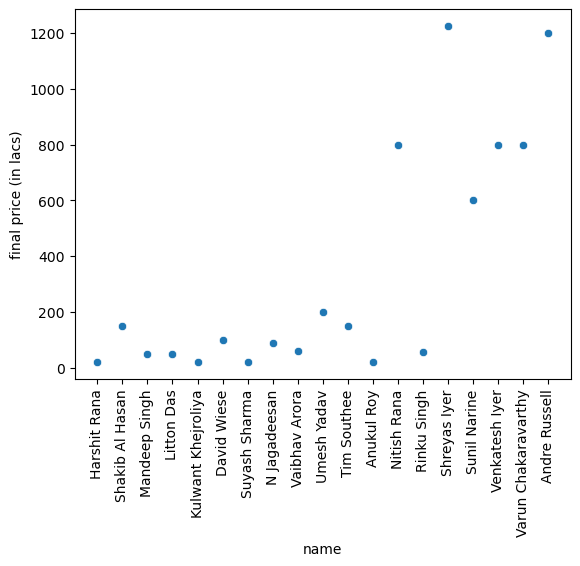

In [99]:
sns.scatterplot(data=kkr,x='name',y='final price (in lacs)')
plt.xticks(rotation=90)
plt.show()

In [96]:
#### analysis

In [95]:
## top 10 player who jumps highest from the base price

df['jump']=df['final price (in lacs)']/df['base price (in lacs)']
df.sort_values(by='jump',ascending=False).head(10)

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status,difference,final>base,ranking,is_sold,jump
292,KL Rahul,WK-Batter,India,59.205298,1700.0,LSG,RETAINED,1640.794702,True,4,0,28.713647
103,Mukesh Kumar,Bowler,India,20.000000,550.0,DC,SOLD,530.000000,True,4,1,27.500000
296,Ravindra Jadeja,Allrounder,India,59.205298,1600.0,CSK,RETAINED,1540.794702,True,4,0,27.024609
290,Rohit Sharma,Batter,India,59.205298,1600.0,MI,RETAINED,1540.794702,True,4,0,27.024609
307,Rishabh Pant,WK-Batter,India,59.205298,1600.0,DC,RETAINED,1540.794702,True,4,0,27.024609
230,Ishan Kishan,WK-Batter,India,59.205298,1525.0,MI,RETAINED,1465.794702,True,4,0,25.757830
282,Virat Kohli,Batter,India,59.205298,1500.0,RCB,RETAINED,1440.794702,True,4,0,25.335570
300,Rashid Khan,Bowler,Afghanistan,59.205298,1500.0,GT,RETAINED,1440.794702,True,4,0,25.335570
301,Hardik Pandya,Allrounder,India,59.205298,1500.0,GT,RETAINED,1440.794702,True,4,0,25.335570
285,Sanju Samson,WK-Batter,India,59.205298,1400.0,RR,RETAINED,1340.794702,True,4,0,23.646532
